# 01 가중치 초기화

In [1]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5', 
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16740\1833172260.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## 선형 함수 가중치 초기화
---

### 제로 초기화
---

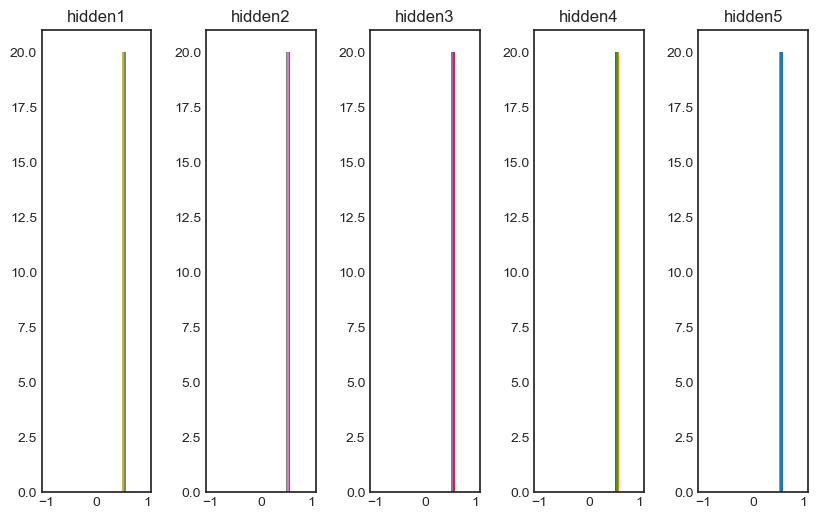

In [3]:
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

### 정규분포 초기화
---

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


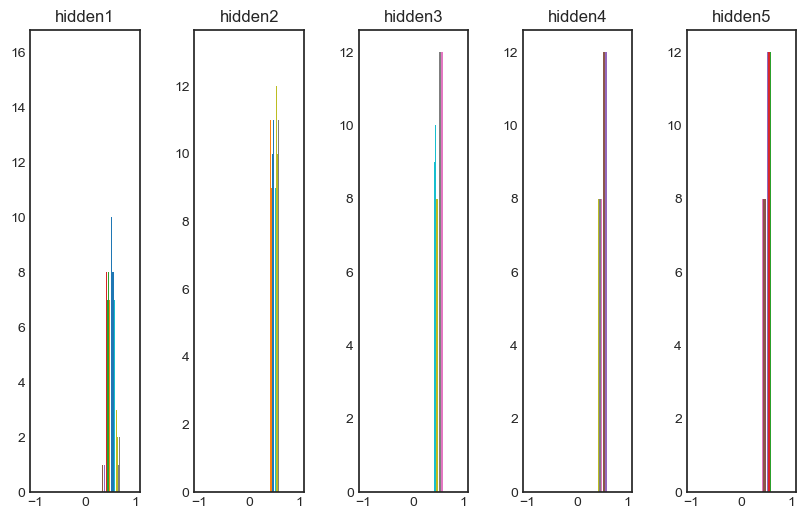

In [4]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

### 균일분포 초기화
---

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


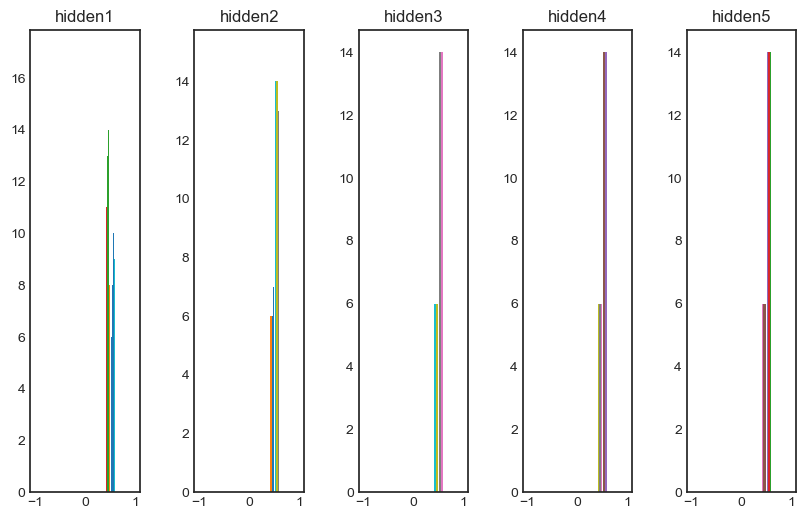

In [5]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

### Xavier(Glorot) 정규분포 초기화
---

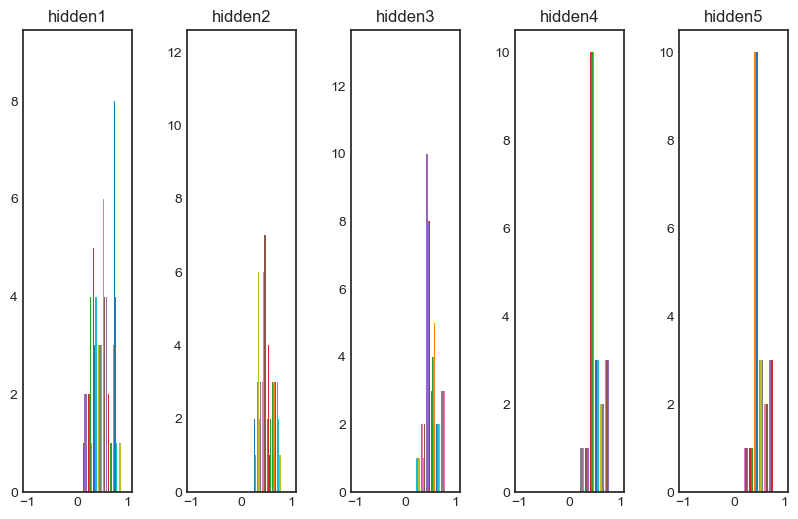

In [6]:
model = build_model(activations.sigmoid, initializers.GlorotNormal(seed=1004))
show_layer(model)

### Xavier(Glorot) 균일분포 초기화
---

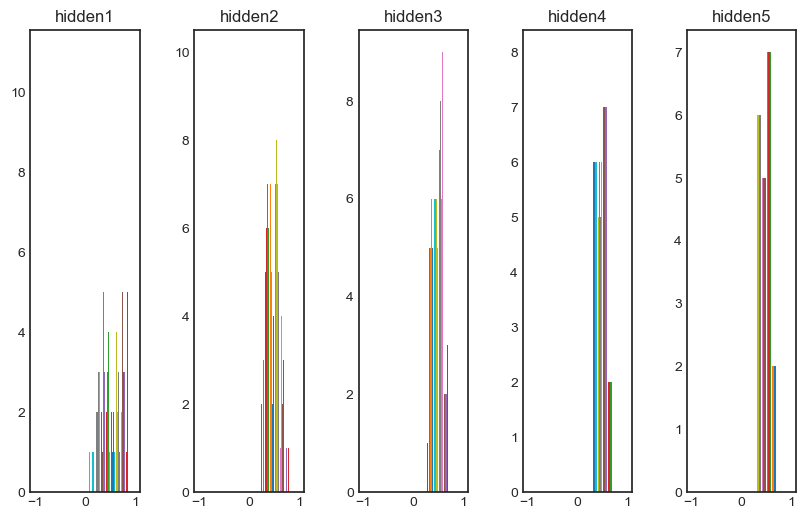

In [7]:
model = build_model(activations.sigmoid, initializers.GlorotUniform(seed=1004))
show_layer(model)

### He 정규분포 초기화
---

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


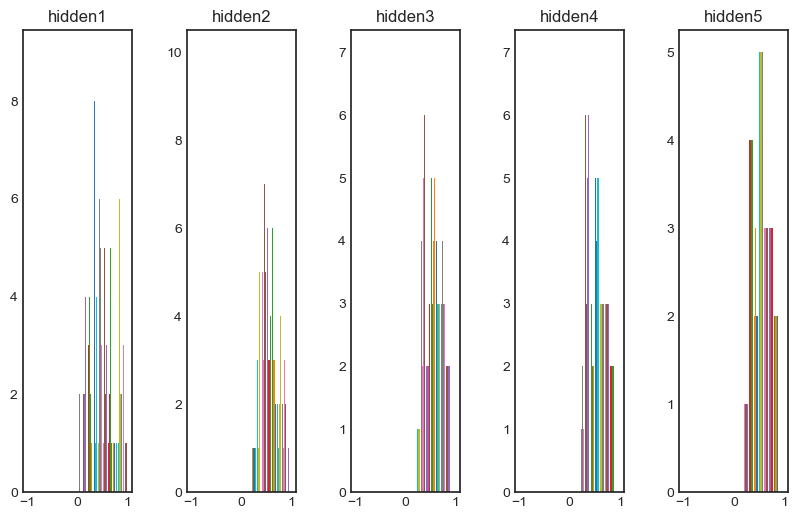

In [8]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

### He 균일분포 초기화
---

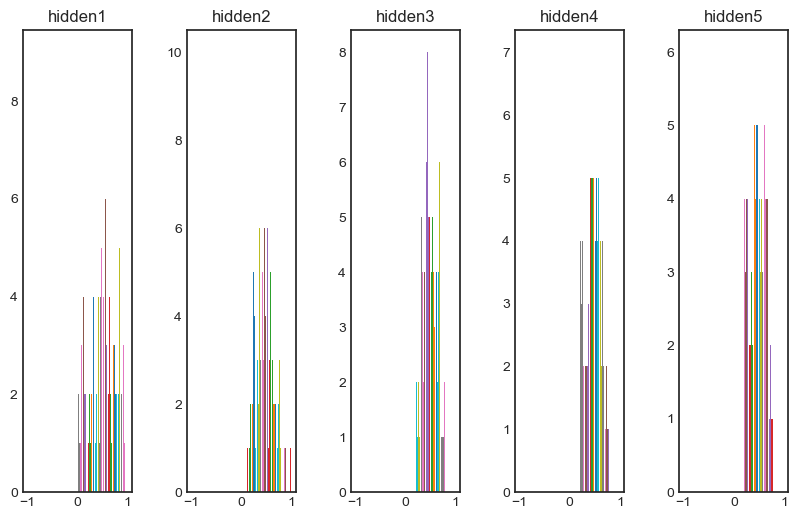

In [9]:
model = build_model(activations.sigmoid, initializers.HeUniform(seed=1004))
show_layer(model)

## 비선형 함수 가중치 초기화

# 02 Reuters 딥러닝 모델 예제

---
## 데이터 로드 및 전처리
---

In [11]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [20]:
word_index = reuters.get_word_index()
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [21]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
index_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [23]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [26]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [27]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [28]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [29]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


---
## 모델 구성
---

In [30]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

---
## 모델 컴파일 및 학습
---

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 46)                5934      
                                                                 
Total params: 1302574 (4.97 MB)
Trainable params: 1302574 (4.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40


18/18 [==============================] - 7s 196ms/step - loss: 2.3036 - accuracy: 0.5536 - val_loss: 1.5130 - val_accuracy: 0.6683
Epoch 2/40
18/18 [==============================] - 2s 137ms/step - loss: 1.2510 - accuracy: 0.7280 - val_loss: 1.2260 - val_accuracy: 0.7320
Epoch 3/40
18/18 [==============================] - 2s 94ms/step - loss: 0.9434 - accuracy: 0.7933 - val_loss: 1.0852 - val_accuracy: 0.7582
Epoch 4/40
18/18 [==============================] - 2s 117ms/step - loss: 0.7243 - accuracy: 0.8400 - val_loss: 0.9899 - val_accuracy: 0.7734
Epoch 5/40
18/18 [==============================] - 2s 131ms/step - loss: 0.5767 - accuracy: 0.8736 - val_loss: 0.9550 - val_accuracy: 0.7801
Epoch 6/40
18/18 [==============================] - 2s 100ms/step - loss: 0.4523 - accuracy: 0.8998 - val_loss: 0.9348 - val_accuracy: 0.7881
Epoch 7/40
18/18 [==============================] - 2s 109ms/step - loss: 0.3521 - accuracy: 0.9233 - val_loss: 0.8972 - val_accuracy: 0.7939
Epoch

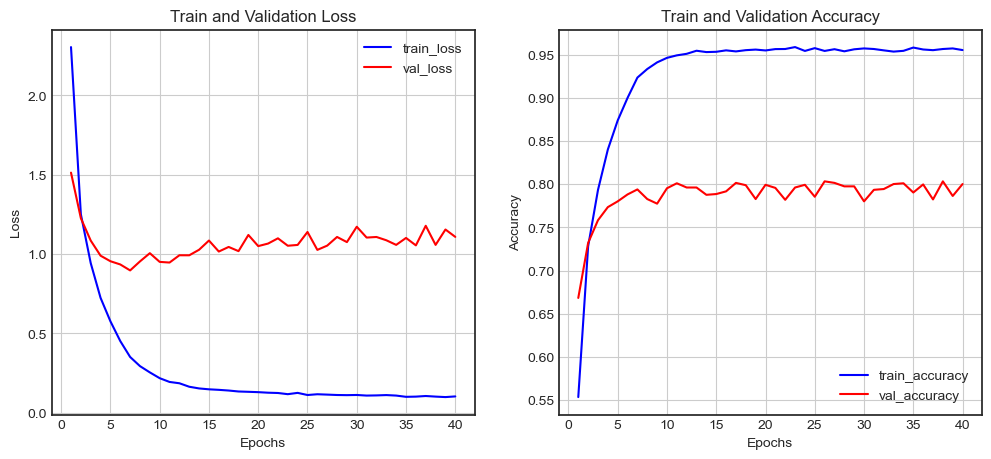

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

---
## 가중치 초기화
---

In [34]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu', 
                         kernel_initializer=initializer,
                         input_shape=(10000, ), 
                         name='input'))
  model.add(layers.Dense(128, 
                         activation='relu', 
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46, 
                         activation='softmax', 
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [37]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

---
### 제로 초기화
---

In [36]:
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 7s 221ms/step - loss: 3.8107 - accuracy: 0.0802 - val_loss: 3.7960 - val_accuracy: 0.2110
Epoch 2/40
18/18 [==============================] - 2s 99ms/step - loss: 3.7846 - accuracy: 0.1867 - val_loss: 3.7730 - val_accuracy: 0.2110
Epoch 3/40
18/18 [==============================] - 2s 96ms/step - loss: 3.7618 - accuracy: 0.2170 - val_loss: 3.7509 - val_accuracy: 0.2110
Epoch 4/40
18/18 [==============================] - 2s 96ms/step - loss: 3.7395 - accuracy: 0.2170 - val_loss: 3.7291 - val_accuracy: 0.2110
Epoch 5/40
18/18 [==============================] - 2s 130ms/step - loss: 3.7174 - accuracy: 0.2170 - val_loss: 3.7074 - val_accuracy: 0.2110
Epoch 6/40
18/18 [==============================] - 2s 120ms/step - loss: 3.6956 - accuracy: 0.2170 - val_loss: 3.6860 - val_accuracy: 0.2110
Epoch 7/40
18/18 [==============================] - 3s 158ms/step - loss: 3.6738 - accuracy: 0.2170 - val_loss: 3.6647 - val_accuracy: 0.2110
Epoch 8/4

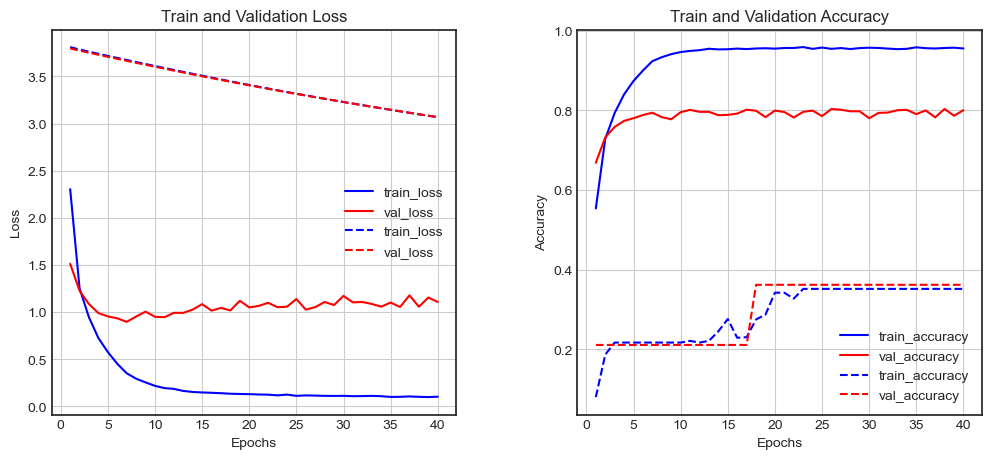

In [38]:
diff_history(history, zero_history)

---
### 정규분포 초기화
---

In [39]:
normal_history = build_model(initializers.RandomNormal())

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 5s 180ms/step - loss: 2.4044 - accuracy: 0.4878 - val_loss: 1.6964 - val_accuracy: 0.5962
Epoch 2/40
18/18 [==============================] - 2s 136ms/step - loss: 1.4529 - accuracy: 0.6680 - val_loss: 1.3919 - val_accuracy: 0.6821
Epoch 3/40
18/18 [==============================] - 2s 105ms/step - loss: 1.1613 - accuracy: 0.7340 - val_loss: 1.2333 - val_accuracy: 0.7208
Epoch 4/40
18/18 [==============================] - 2s 91ms/step - loss: 0.9629 - accuracy: 0.7808 - val_loss: 1.1546 - val_accuracy: 0.7453
Epoch 5/40
18/18 [==============================] - 2s 105ms/step - loss: 0.8067 - accuracy: 0.8182 - val_loss: 1.0709 - val_accuracy: 0.7498
Epoch 6/40
18/18 [==============================] - 2s 86ms/step - loss: 0.6755 - accuracy: 0.8455 - val_loss: 1.0181 - val_accuracy: 0.7645
Epoch 7/40
18/18 [==============================] - 1s 75ms/step - loss: 0.5606 - accuracy: 0.8724 - val_loss: 1.0011 - val_accuracy: 0.7640
Epoch 8/4

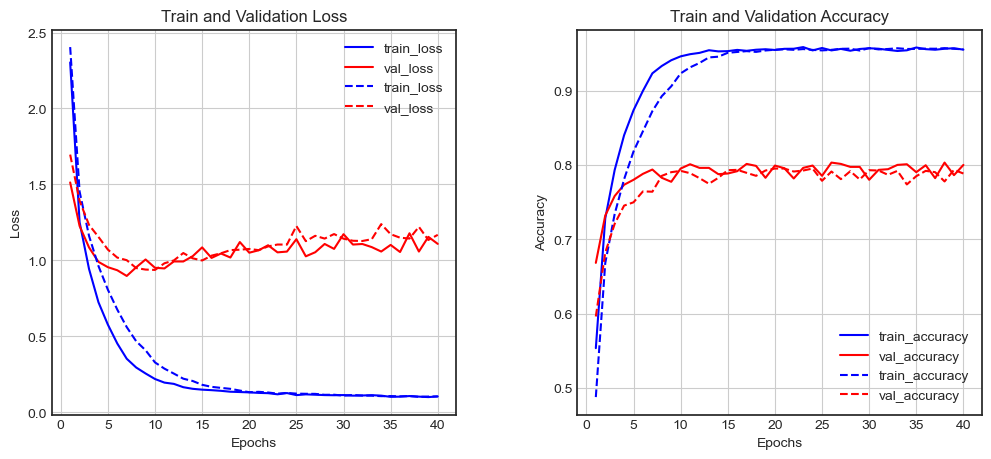

In [40]:
diff_history(history, normal_history)

---
### Xavier(Glorot) 초기화
---

In [41]:
glorot_history = build_model(initializers.GlorotNormal())

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 6s 164ms/step - loss: 2.2713 - accuracy: 0.5469 - val_loss: 1.4999 - val_accuracy: 0.6897
Epoch 2/40
18/18 [==============================] - 2s 104ms/step - loss: 1.2112 - accuracy: 0.7325 - val_loss: 1.2289 - val_accuracy: 0.7204
Epoch 3/40
18/18 [==============================] - 1s 82ms/step - loss: 0.9023 - accuracy: 0.8056 - val_loss: 1.0641 - val_accuracy: 0.7591
Epoch 4/40
18/18 [==============================] - 2s 115ms/step - loss: 0.6899 - accuracy: 0.8489 - val_loss: 1.0289 - val_accuracy: 0.7622
Epoch 5/40
18/18 [==============================] - 2s 104ms/step - loss: 0.5487 - accuracy: 0.8840 - val_loss: 0.9274 - val_accuracy: 0.7876
Epoch 6/40
18/18 [==============================] - 1s 80ms/step - loss: 0.4378 - accuracy: 0.9065 - val_loss: 0.9104 - val_accuracy: 0.7858
Epoch 7/40
18/18 [==============================] - 1s 75ms/step - loss: 0.3536 - accuracy: 0.9231 - val_loss: 0.8891 - val_accuracy: 0.7974
Epoch 8/4

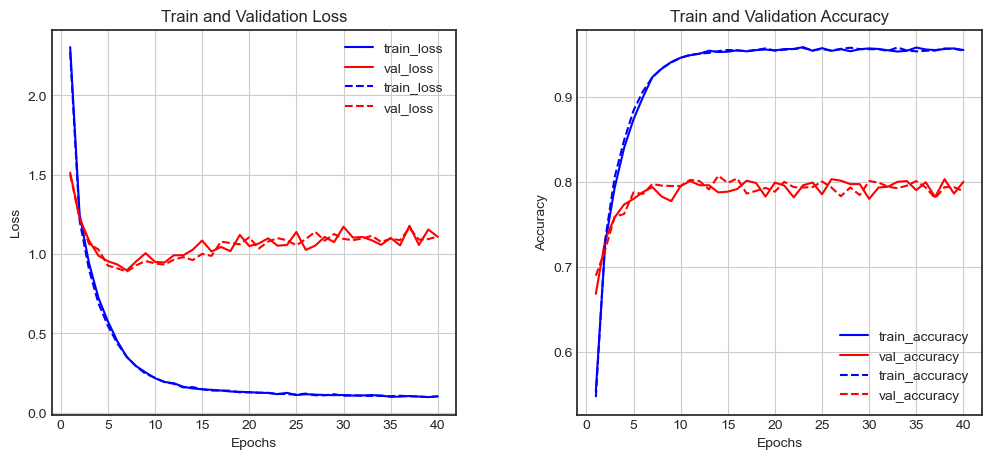

In [42]:
diff_history(history, glorot_history)

---
### He 초기화
---

In [43]:
he_history = build_model(initializers.HeNormal())

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/40
18/18 [==============================] - 6s 162ms/step - loss: 2.1375 - accuracy: 0.5789 - val_loss: 1.4382 - val_accuracy: 0.6870
Epoch 2/40
18/18 [==============================] - 1s 79ms/step - loss: 1.1429 - accuracy: 0.7547 - val_loss: 1.1614 - val_accuracy: 0.7360
Epoch 3/40
18/18 [==============================] - 2s 116ms/step - loss: 0.8368 - accuracy: 0.8210 - val_loss: 1.0154 - val_accuracy: 0.7765
Epoch 4/40
18/18 [==============================] - 2s 94ms/step - loss: 0.6152 - accuracy: 0.8695 - val_loss: 0.9503 - val_accuracy: 0.7841
Epoch 5/40
18/18 [==============================] - 2s 96ms/step - loss: 0.4678 - accuracy: 0.9015 - val_loss: 0.8963 - val_accuracy: 0.7965
Epoch 6/40
18/18 [==============================] - 1s 83ms/step - loss: 0.3688 - accuracy: 0.9186 - val_loss: 0.8764 - val_accuracy: 0.7988
Epoch 7/40
18/18 [==============================] - 1s 81ms/step - loss: 0.2848 - accuracy: 0.9348 - val_loss: 0.8747 - val_accuracy: 0.8041
Epoch 8/40


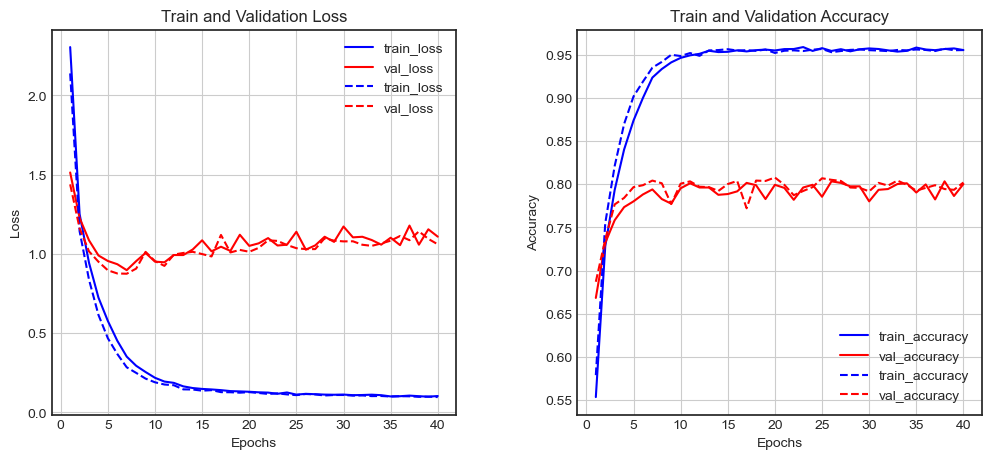

In [44]:
diff_history(history, he_history)

---
# 03 배치 정규화
---

---
## 모델 구성 및 컴파일
---

In [45]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128)             

In [46]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 10s 187ms/step - loss: 1.8776 - accuracy: 0.6399 - val_loss: 3.3397 - val_accuracy: 0.7476
Epoch 2/40
18/18 [==============================] - 2s 104ms/step - loss: 0.6797 - accuracy: 0.8769 - val_loss: 3.1049 - val_accuracy: 0.7565
Epoch 3/40
18/18 [==============================] - 2s 133ms/step - loss: 0.3717 - accuracy: 0.9330 - val_loss: 2.8208 - val_accuracy: 0.7253
Epoch 4/40
18/18 [==============================] - 2s 108ms/step - loss: 0.2469 - accuracy: 0.9492 - val_loss: 2.4583 - val_accuracy: 0.7061
Epoch 5/40
18/18 [==============================] - 2s 103ms/step - loss: 0.1867 - accuracy: 0.9509 - val_loss: 2.1418 - val_accuracy: 0.6772
Epoch 6/40
18/18 [==============================] - 2s 125ms/step - loss: 0.1618 - accuracy: 0.9520 - val_loss: 1.8489 - val_accuracy: 0.7329
Epoch 7/40
18/18 [==============================] - 2s 91ms/step - loss: 0.1402 - accuracy: 0.9525 - val_loss: 1.6435 - val_accuracy: 0.6750
Epoch 

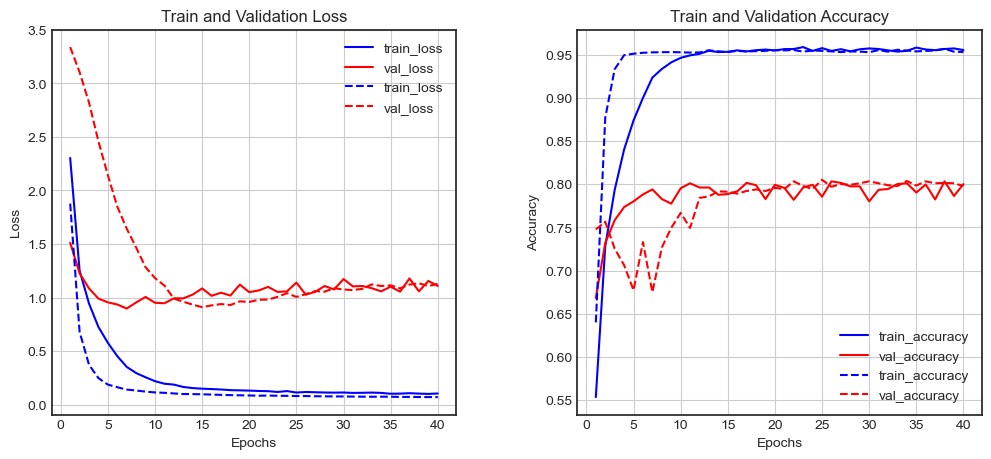

In [47]:
diff_history(history, batch_norm_history)

---
## 실습(순서 역전)
---

In [48]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.Activation('relu')) 
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, name='hidden'))
model.add(layers.Activation('relu')) 
model.add(layers.BatchNormalization())
model.add(layers.Dense(46, activation='softmax', name='output'))
model.add(layers.BatchNormalization())

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                    

In [49]:
orderd_bn_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 11s 194ms/step - loss: 10.8306 - accuracy: 0.1619 - val_loss: 3.4327 - val_accuracy: 0.2070
Epoch 2/40
18/18 [==============================] - 2s 108ms/step - loss: 10.5122 - accuracy: 0.1925 - val_loss: 4.5620 - val_accuracy: 0.2128
Epoch 3/40
18/18 [==============================] - 2s 98ms/step - loss: 11.2780 - accuracy: 0.2150 - val_loss: 12.1671 - val_accuracy: 0.2155
Epoch 4/40
18/18 [==============================] - 2s 102ms/step - loss: 11.1905 - accuracy: 0.2277 - val_loss: 6.1972 - val_accuracy: 0.2191
Epoch 5/40
18/18 [==============================] - 2s 103ms/step - loss: 11.4346 - accuracy: 0.2509 - val_loss: 4.8522 - val_accuracy: 0.2805
Epoch 6/40
18/18 [==============================] - 2s 109ms/step - loss: 10.9731 - accuracy: 0.2597 - val_loss: 6.4262 - val_accuracy: 0.2262
Epoch 7/40
18/18 [==============================] - 2s 106ms/step - loss: 10.7942 - accuracy: 0.2170 - val_loss: 6.3436 - val_accuracy: 0.267

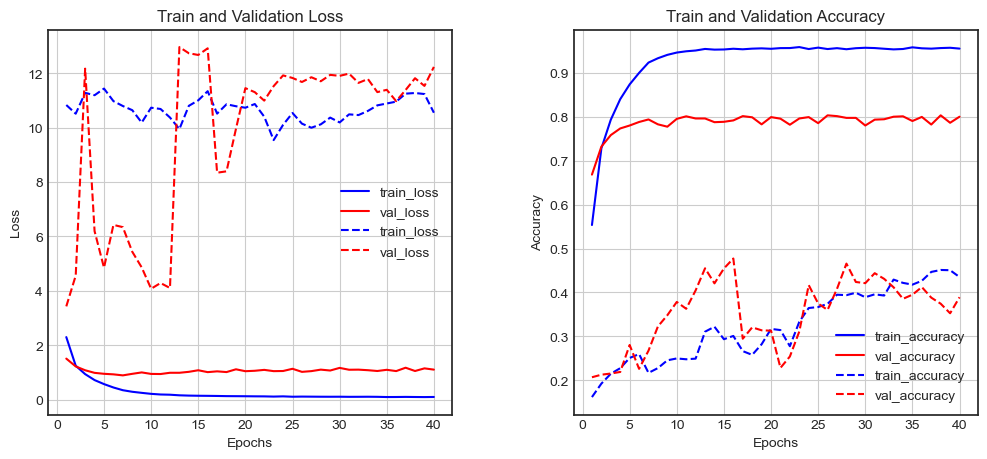

In [50]:
diff_history(history, orderd_bn_history)